# Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df=pd.read_csv("../data/train.csv")
test_df=pd.read_csv("../data/test.csv")

In [4]:
train_df

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.700,204.0,3.5,100
175292,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.800,209.0,3.2,100
175293,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.800,208.0,2.6,57
175294,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.700,206.0,2.1,0


In [5]:
train_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [6]:
test_df.isnull().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

## Exploratory Data Analysis

So we have absolutely no missing values in any column for train or test datasets. Now we explore each of the individual columns and the target variables. We already know what `Year`,`Month`,`Day` and the other similar data points are. We start with the target variables

(array([92738.,  4171.,  3177.,  3444.,  2779.,  3367.,  2748.,  3389.,
         3040.,  3298.,  3447.,  3457.,  4228.,  4425.,  4698.,  4134.,
         3898.,  3717.,  3921.,  3741.,  3792.,  4139.,  3996.,  1410.,
          142.]),
 array([   0.  ,   42.52,   85.04,  127.56,  170.08,  212.6 ,  255.12,
         297.64,  340.16,  382.68,  425.2 ,  467.72,  510.24,  552.76,
         595.28,  637.8 ,  680.32,  722.84,  765.36,  807.88,  850.4 ,
         892.92,  935.44,  977.96, 1020.48, 1063.  ]),
 <BarContainer object of 25 artists>)

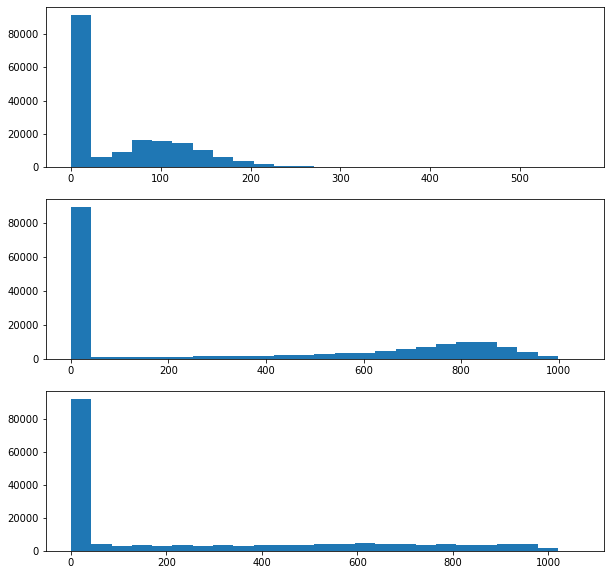

In [41]:
fig,ax=plt.subplots(3,figsize=(10,10))
ax[0].hist(train_df['Clearsky DHI'],bins=25)
ax[1].hist(train_df['Clearsky DNI'],bins=25)
ax[2].hist(train_df['Clearsky GHI'],bins=25)


**Clearsky DHI:** DHI is acronym for Diffused Horizontal Irradiance which represents solar radiation that does not arrive on a direct path from the sun, but has been scattered by clouds and particles in the atmosphere and comes equally from all directions.
<br>

**Clearsky DNI:** DNI is acronym for Diffused Normal Irradiance which represents the amount of light that is coming perpendicular to surface. The surface here represents ground or something parallel to ground. This type of irradiance belongs to rays that come in a straight line from the direction of the sun at its current position in the sky. Solar collectors, panels maximize this DHI by means of tilting or rotating with angle of sun. <br>

**Clearsky GHI:** GHI is acronym for Global Horizontal Irradiance which represents the total amount of shortwave radiation received from above by a surface which is horizontal (parallel) to the ground. GHI is the most important parameter for calculation of PV electricity yield. Both DHI & DNI are actually components of GHI. Mathematically, <br><br>

Global Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)  +  Diffused Horizontal Irradiance (DHI)

In [9]:
train_df['Cloud Type'].value_counts()

0     82788
7     23163
3     16255
1     15698
8     14276
4     11738
6      7902
2      3018
9       457
10        1
Name: Cloud Type, dtype: int64

#### Cloud Type
Cloud Type 0    Clear <br>
Cloud Type 1    Probably Clear<br>
Cloud Type 2    Fog<br>
Cloud Type 3    Water<br>
Cloud Type 4    Super-Cooled Water<br>
Cloud Type 5    Mixed<br>
Cloud Type 6    Opaque Ice<br>
Cloud Type 7    Cirrus<br>
Cloud Type 8    Overlapping<br>
Cloud Type 9    Overshooting<br>
Cloud Type 10    Unknown<br>
Cloud Type 11    Dust<br>
Cloud Type 12    Smoke<br>
Cloud Type -15    N/A<br>